# Background removal and image cropping to process Cornell dataset

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import utils

Get datapoints and background mappings from `utils`.

In [2]:
dps = utils.prepare_datapoints()
bgs = utils.read_backgrounds()
bg_mapping = utils.get_background_mappings()

There are 896 image files and 885 cpos files
Prepared 5107 datapoints
Total 11 background files


Pick one image along with it's background.
These two images will be used in conjunction to get results.

In [3]:
d = dps[100]
bg = bgs[bg_mapping[d.image_name]]
img = d.get_image(gray=True, background=None)
bg = cv2.cvtColor(bg, utils.cv2.COLOR_RGB2GRAY)

**Image (grayscaled)**

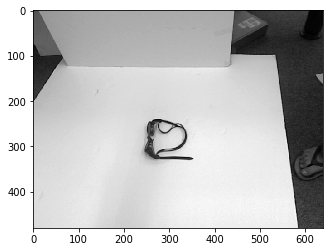

In [4]:
plt.imshow(img, cmap='gray')

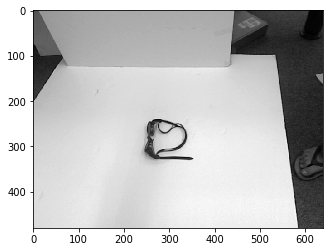

In [5]:
d.background_image = bg
x = d.get_image(background=bg)
plt.imshow(x, cmap='gray')

**Background (grayscaled)**

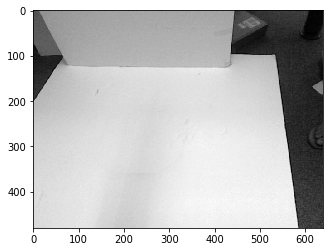

In [6]:
plt.imshow(bg, cmap='gray')

### Subtracting background from image

In the image below, the background is pixel-by-pixel subtracted from the image.

This was intended to remove the background completely from the image.

However, it resulted in `salt-and-pepper` noise.

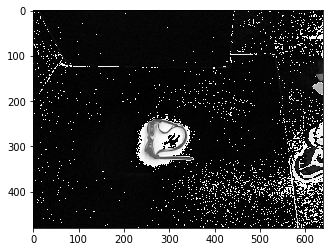

In [7]:
diff = (img.astype('float') - bg.astype('float')).astype('uint8')
plt.imshow(diff, cmap='gray')

### Removing `salt-and-pepper` noise by using Median blurring two times

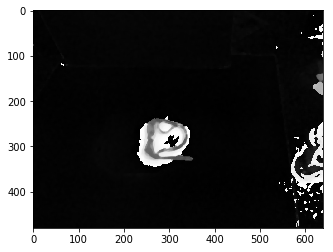

In [9]:
median = cv2.medianBlur(diff, 7)
plt.imshow(median, cmap='gray')

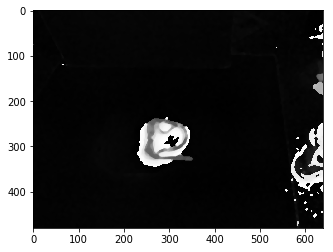

In [10]:
second_median = cv2.medianBlur(median, 5)
plt.imshow(second_median, cmap='gray')

### Absolute difference of image and background

In the image below, the absolute value of pixel-by-pixel difference of background and image is taken.

This was intended to remove the background completely from the image.

This resulted in almost neglegible noise compared to previous background removal method along with mask along the object.

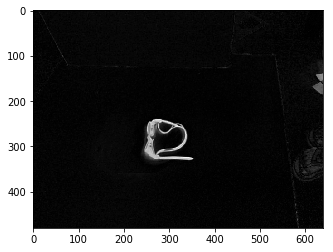

In [14]:
absdiff = cv2.absdiff(img, bg)
plt.imshow(absdiff, cmap='gray')

In [ ]:
thresholded = absdiff > 5 : 

## Performing some proof-of-concept on image cropping

array([[ 2,  3,  3, ...,  0,  2,  3],
       [ 0,  2,  2, ...,  1,  2,  1],
       [ 0,  1,  3, ...,  2,  1,  1],
       ...,
       [ 3,  3,  4, ...,  1, 17, 24],
       [ 5,  5,  5, ...,  5, 25, 25],
       [ 6,  7,  9, ...,  3, 16, 23]], dtype=uint8)

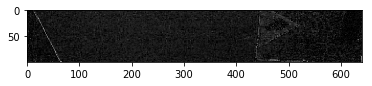

In [12]:
croppedimg = absdiff[1:100, :]
plt.imshow(croppedimg, cmap='gray')
croppedimg

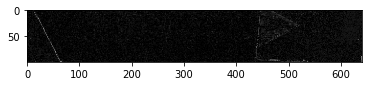

In [13]:
meanbg = int(croppedimg.mean())
result = cv2.absdiff(croppedimg, meanbg)
plt.imshow(result, cmap='gray')
a = (result > croppedimg).flatten()
x, y = np.bincount(a), a.size
